In [1]:
import getpass
import cordra
from lucenequerybuilder import Q
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

# Cordra Host Information

In [2]:
host = "https://localhost:8443/"
credentials_file = "~/test_user_cordra.json"

localhost = cordra.CordraClient(host=host, credentials_file=credentials_file, verify=False)

In [3]:
localhost.schemas

{'Dataset': {'$schema': 'http://json-schema.org/draft-04/schema#',
  'type': 'object',
  'title': 'Dataset',
  'description': 'This schema is for describing a Dataset in Cordra.',
  'required': ['@id', '@context', '@type'],
  'definitions': {'materialLinked': {'type': 'array',
    'title': 'Materials',
    'description': 'This field is for linking to any substance (e.g., sample, specimen, material, chemical, etc.), or a specific sup-sample (e.g., location on a larger artifact, sub-portion of a larger artifact, item within a collection of specimens, etc.).',
    'uniqueItems': True,
    'items': {'type': 'string',
     'title': 'Material',
     'cordra': {'type': {'handleReference': {'types': ['Material']}}}}},
   'QuantitativeValue': {'type': 'object',
    'properties': {'@type': {'type': 'string', 'default': 'QuantitativeValue'},
     'name': {'type': 'string', 'title': 'Name'},
     'value': {'title': 'Value'},
     'unitText': {'title': 'Unit Text', 'type': 'string'},
     'unitCode

In [4]:
obj_type = "Document"

# Create two similar objects

In [5]:
file_1 = "example-data.csv"
payloads = {'p1': (file_1, open(file_1,'rb'))}

obj_1 = dict()
obj_1["name"] = "example 1"
obj_1["description"] = "an example of metadata for CSV payload"
obj_1["author"] = "John"

my_acl = dict()
my_acl["readers"] = ["public"]

response = localhost.create(obj_1, obj_type, acls=my_acl, payloads=payloads)
response

{'id': 'test/ae1bbaed41ada5524981',
 'name': 'example 1',
 'description': 'an example of metadata for CSV payload',
 'author': 'John'}

In [6]:
file_2 = "example-data.csv"
payloads = {'p1': (file_2, open(file_2,'rb'))}

obj_2 = dict()
obj_2["name"] = "example 2"
obj_2["description"] = "another example of metadata for CSV payload"
obj_2["author"] = "Tim"

my_acl = dict()
my_acl["readers"] = ["public"]

response = localhost.create(obj_2, obj_type, acls=my_acl, payloads=payloads)
response

{'id': 'test/aef168409120ada825c2',
 'name': 'example 2',
 'description': 'another example of metadata for CSV payload',
 'author': 'Tim'}

# Query objects

## Full text query example

In [7]:
q = Q('metadata')
my_results = localhost.find(str(q))
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 17,
 'results': [{'id': 'test/bc2bf80fc64a79484422',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/dbde3a33a2a98e30f9b1',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/b599a8b2c7a46e4380cf',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/36c0c6de94202a76c48d',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/09d94e358c460a137cd4',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/76f493bfe4dee7e69dd8',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/31e38aab3413574e553a',
   'name': 'example 1',
   'descriptio

## Field query examples

In [8]:
q = Q('/author','John')
my_results = localhost.find(str(q))
obj_id_1 = my_results["results"][0]["id"]
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 12,
 'results': [{'id': 'test/bc2bf80fc64a79484422',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/dbde3a33a2a98e30f9b1',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/b599a8b2c7a46e4380cf',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/36c0c6de94202a76c48d',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/76f493bfe4dee7e69dd8',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/31e38aab3413574e553a',
   'name': 'example 1',
   'description': 'an example of metadata for CSV payload',
   'author': 'John'},
  {'id': 'test/26ef6f8f113c93201aab',
   'name': 'example 1',
   'description': 

In [9]:
q = Q('/author','Tim')
my_results = localhost.find(str(q))
obj_id_2 = my_results["results"][0]["id"]
my_results

{'pageNum': 0,
 'pageSize': -1,
 'size': 5,
 'results': [{'id': 'test/09d94e358c460a137cd4',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/25d5f8dc7ec922357ec0',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/ed4740dfe2341853569d',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/aef168409120ada825c2',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'},
  {'id': 'test/d92d43a269b89a3e6a10',
   'name': 'example 2',
   'description': 'another example of metadata for CSV payload',
   'author': 'Tim'}]}

# Read objects

In [10]:
obj_id_2

'test/09d94e358c460a137cd4'

In [11]:
my_obj = localhost.read(obj_id_2)
my_obj

{'id': 'test/09d94e358c460a137cd4',
 'name': 'example 2',
 'description': 'another example of metadata for CSV payload',
 'author': 'Tim'}

In [12]:
my_obj = localhost.read(obj_id_2,full=True)
my_obj

{'id': 'test/09d94e358c460a137cd4',
 'type': 'Document',
 'content': {'id': 'test/09d94e358c460a137cd4',
  'name': 'example 2',
  'description': 'another example of metadata for CSV payload',
  'author': 'Tim'},
 'acl': {'readers': ['public']},
 'metadata': {'createdOn': 1631524476621,
  'createdBy': 'test/04df9d913013b0680e93',
  'modifiedOn': 1631524476621,
  'modifiedBy': 'test/04df9d913013b0680e93',
  'txnId': 1631524476621025},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

In [13]:
obj_payload_name = my_obj["payloads"][0]["name"]
obj_payload_name

'p1'

In [14]:
payload = localhost.read(obj_id_2, getAll=True)["payloads"][obj_payload_name]
payload

'\ufeff"SAM0","SAM1"\r\n1.00,2.302389071\r\n2.00,3.71503899\r\n3.00,9.426125622\r\n4.00,11.34529125\r\n5.00,11.87704484\r\n6.00,19.01325695\r\n7.00,21.52353652\r\n8.00,28.28670056\r\n9.00,29.55737761\r\n10.00,25.89582707\r\n11.00,31.57982065\r\n12.00,36.02452105\r\n13.00,39.47686412\r\n14.00,44.41192202\r\n15.00,43.36098819\r\n16.00,48.61525381\r\n17.00,53.91222295\r\n18.00,54.28420278\r\n19.00,53.1378195\r\n20.00,55.88015939'

In [15]:
df = pd.read_csv(StringIO(payload))
df

,SAM0,SAM1
0,1.0,2.302389
1,2.0,3.715039
2,3.0,9.426126
3,4.0,11.345291
4,5.0,11.877045
5,6.0,19.013257
6,7.0,21.523537
7,8.0,28.286701
8,9.0,29.557378
9,10.0,25.895827


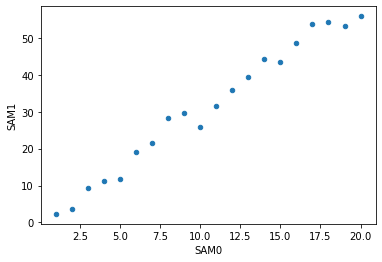

In [16]:
df.plot.scatter(x='SAM0', y='SAM1')
plt.show()

# Update Objects

This also demonstrates the use of "Dry Run". During a "Dry Run", Cordra not actually create/update the object. Cordra will return results as if object had been created/updated. 

## Update part of the object JSON

payloads not affected

In [17]:
response = localhost.update(
    "I really need to write a better description for my data.",
    obj_id_2,
    jsonPointer="/description",
    dryRun=True,
    full=True)
response

{'id': 'test/09d94e358c460a137cd4',
 'type': 'Document',
 'content': {'id': 'test/09d94e358c460a137cd4',
  'name': 'example 2',
  'description': 'I really need to write a better description for my data.',
  'author': 'Tim'},
 'acl': {'readers': ['public']},
 'metadata': {'createdOn': 1631524476621,
  'createdBy': 'test/04df9d913013b0680e93',
  'modifiedOn': 1631534373872,
  'modifiedBy': 'test/04df9d913013b0680e93',
  'txnId': 1631524476621025},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

## Update all of the object JSON

payloads not affected

In [18]:
response = localhost.update(
    {"SAM1":"Level of CXCR4 expression"},
    obj_id_2,
    dryRun=True,
    full=True)
response

{'id': 'test/09d94e358c460a137cd4',
 'type': 'Document',
 'content': {'id': 'test/09d94e358c460a137cd4',
  'SAM1': 'Level of CXCR4 expression'},
 'acl': {'readers': ['public']},
 'metadata': {'createdOn': 1631524476621,
  'createdBy': 'test/04df9d913013b0680e93',
  'modifiedOn': 1631534373892,
  'modifiedBy': 'test/04df9d913013b0680e93',
  'txnId': 1631524476621025},
 'payloads': [{'name': 'p1', 'filename': 'example-data.csv', 'size': 385}]}

## Update just ACLs

payloads not affected

In [19]:
response = localhost.update(
    None,
    obj_id_2,
    acls={"readers":None,"writers":None})
response

{}

In [20]:
# this should return a 401 error

try:
    my_obj = localhost.read(obj_id_2)
except Exception as e: 
    print(e)

In [21]:
my_obj = localhost.read(obj_id_2,getAll=True)
my_obj

{'id': 'test/09d94e358c460a137cd4',
 'type': 'Document',
 'content': {'id': 'test/09d94e358c460a137cd4',
  'name': 'example 2',
  'description': 'another example of metadata for CSV payload',
  'author': 'Tim'},
 'acl': {},
 'metadata': {'createdOn': 1631524476621,
  'createdBy': 'test/04df9d913013b0680e93',
  'modifiedOn': 1631534373922,
  'modifiedBy': 'test/04df9d913013b0680e93',
  'txnId': 1631534373917046},
 'payloads': {'p1': '\ufeff"SAM0","SAM1"\r\n1.00,2.302389071\r\n2.00,3.71503899\r\n3.00,9.426125622\r\n4.00,11.34529125\r\n5.00,11.87704484\r\n6.00,19.01325695\r\n7.00,21.52353652\r\n8.00,28.28670056\r\n9.00,29.55737761\r\n10.00,25.89582707\r\n11.00,31.57982065\r\n12.00,36.02452105\r\n13.00,39.47686412\r\n14.00,44.41192202\r\n15.00,43.36098819\r\n16.00,48.61525381\r\n17.00,53.91222295\r\n18.00,54.28420278\r\n19.00,53.1378195\r\n20.00,55.88015939'}}

# Delete objects

In [22]:
response = localhost.delete(obj_id_2)
response

{}

# Delete Token

In [23]:
r =  localhost.delete_auth()
r

{'active': False}